# Diamond-Analysis-3

The goal in this step is to integrate additional diamond data feeds and re-evaluate (1) our model and (2) the data source set for real world diamond estimation


Score:  0.9760102523271434
[ 8.88718130e+03 -1.28495059e+16 -1.28495059e+16 -1.28495059e+16
 -1.28495059e+16 -1.28495059e+16 -1.00636224e+16 -1.00636224e+16
 -1.00636224e+16 -1.00636224e+16 -1.00636224e+16 -1.00636224e+16
 -1.00636224e+16  1.03598372e+16  1.03598372e+16  1.03598372e+16
  1.03598372e+16  1.03598372e+16  1.03598372e+16  1.03598372e+16
  1.03598372e+16]


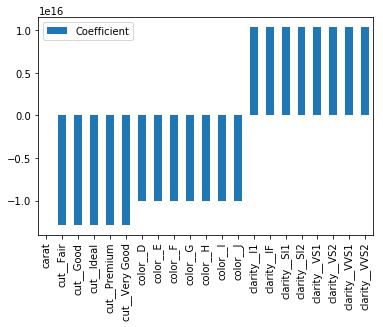

,0,actuals
19,4246.0,NaN
15,1688.0,NaN
7,6562.0,NaN
11,530.0,NaN
18,2120.0,NaN


In [78]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
diamonds.head()
diamonds.describe()

# Split the targets into training/testing sets
diamonds_y_train = diamonds.price[:-20]
diamonds_y_test = diamonds.price[-20:]
diamonds = diamonds.drop(columns=['price','Unnamed: 0'])

# Split the data into training/testing sets
diamonds_X_train = diamonds[:-20]
diamonds_X_test = diamonds[-20:]

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(diamonds_X_train, diamonds_y_train)

print('Score: ', regr.score(diamonds_X_test, diamonds_y_test))
print(regr.coef_)
coeff_df = pd.DataFrame(regr.coef_, diamonds_X_train.columns, columns=['Coefficient'])  
coeff_df.plot(kind='bar')
plt.show()

diamonds_y_pred = regr.predict(diamonds_X_test)
res = pd.DataFrame(diamonds_y_pred)
res['actuals'] =  diamonds_y_test

res.sample(5)

In [79]:
# loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
 
# Loading the data
DATA_DIR = '.'
FILE_NAME = 'Diamond_source2.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds2 = pd.read_csv(data_path)

# col cleanup
diamonds2 = diamonds2.drop(columns=['Unnamed: 0'])
colors = pd.get_dummies( diamonds2['colour'], prefix='color_')
clarity = pd.get_dummies( diamonds2['clarity'], prefix='clarity_')
price = diamonds2['price']
diamonds2 = diamonds2.join(colors).join(clarity)
diamonds2 = diamonds2.drop(columns=['price','colour','clarity','certification'])

# zero filling the extra cols
diamonds2.insert(1,'cut__Very Good',0)
diamonds2.insert(1,'cut__Premium',0)
diamonds2.insert(1,'cut__Ideal',0)
diamonds2.insert(1,'cut__Good',0)
diamonds2.insert(1,'cut__Fair',0)
diamonds2.insert(12,'color__J',0)
diamonds2.insert(13,'clarity__I1',0)
diamonds2.insert(15,'clarity__SI2',0)
diamonds2.insert(15,'clarity__SI1',0)
diamonds2.head()

diamonds_y_pred = regr.predict(diamonds2)
res = pd.DataFrame(diamonds_y_pred)
res['actual'] = price

print('Score: ', regr.score(diamonds2, price))
res.head()


Score:  -1.4303152289735083e+25


,0,actual
0,1.284951e+16,1302
1,1.284951e+16,1510
2,1.284951e+16,1510
3,1.284951e+16,1260
4,1.284951e+16,1641


In [27]:
diamonds.head()

,carat,cut__Fair,cut__Good,cut__Ideal,cut__Premium,cut__Very Good,color__D,color__E,color__F,color__G,...,color__I,color__J,clarity__I1,clarity__IF,clarity__SI1,clarity__SI2,clarity__VS1,clarity__VS2,clarity__VVS1,clarity__VVS2
15840,1.02,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33198,0.40,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
19618,1.51,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
27089,2.10,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
28921,0.30,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
diamonds2.head()

,carat,cut__Fair,cut__Good,cut__Ideal,cut__Premium,cut__Very Good,color__D,color__E,color__F,color__G,...,color__I,color__J,clarity__I1,clarity__IF,clarity__SI1,clarity__SI2,clarity__VS1,clarity__VS2,clarity__VVS1,clarity__VVS2
0,0.30,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.30,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.30,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.30,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Score:  0.9187743277836133


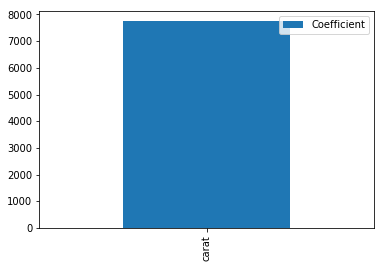

Mean squared error: 708335.77
Variance score: 0.92
       carat
14650   1.31
52416   0.71
          actual  predict         diff       diff%
3    7904.568690     5916  1988.568690   25.157207
16   3250.898130     2513   737.898130   22.698285
6    3173.336954     1999  1174.336954   37.006374
10  10231.403970     9005  1226.403970   11.986664
2    7284.079282     6817   467.079282    6.412331
14   9533.353386     9405   128.353386    1.346361
4    -394.477141      552  -946.477141  239.932063
             price
count    20.000000
mean   3520.950000
std    3029.780233
min     552.000000
25%    1219.500000
50%    1906.500000
75%    6059.500000
max    9405.000000


In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from myutils import run_linear2
%matplotlib inline    

diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds['carat'].to_frame()
target = diamonds['price'].to_frame()
run_linear2(data, target)
